# SAJulia Exploration


## Sobol Sensitivity Analysis

## Set Up

In [4]:
using Distributions
using VegaLite
using DataFrames
using DataStructures

include("../src/sample_sobol.jl")
include("../src/analyze_sobol.jl")
include("../src/test_functions/ishigami.jl")

ishigami

### 1. Sampling

In [6]:
# define the data payload
data = SobolPayload(
    params = OrderedDict(:x1 => Uniform(-3.14159265359, 3.14159265359),
        :x2 => Uniform(-3.14159265359, 3.14159265359),
        :x3 => Uniform(-3.14159265359, 3.14159265359)),
    N = 1000
)

SobolPayload(OrderedDict(:x1=>Uniform{Float64}(a=-3.14159, b=3.14159),:x2=>Uniform{Float64}(a=-3.14159, b=3.14159),:x3=>Uniform{Float64}(a=-3.14159, b=3.14159)), false, 1000)

### Sampling - Sobol sequence

In [12]:
# Get the sobol sequence intermediate
sequence = sobol_sequence(data.N, 3);

In [13]:
# generate samples
param_values = sample(data);

### Sampling - Plotting


WARN Invalid field type "undefined" for channel "color", using "nominal" instead.
WARN Invalid field type "undefined" for channel "color", using "nominal" instead.


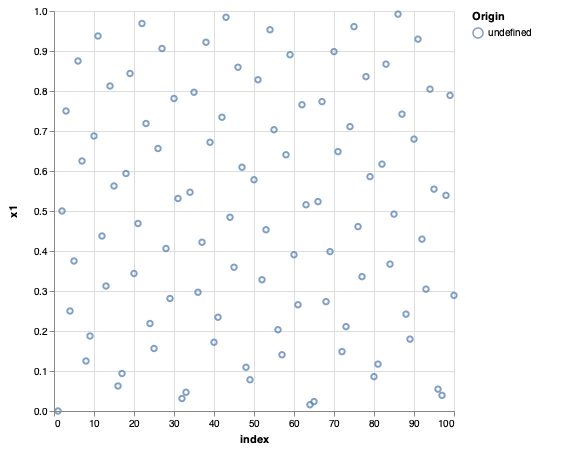

In [17]:
#distribution of sobol_sequence values
sequence = sobol_sequence(100, length(data.params)) |> DataFrame
indicis = DataFrame(index = 1:100)
df = [indicis sequence]

df |>
@vlplot(
    :point,
    x=:index,
    y=:x1,
    color=:Origin,
    width=400,
    height=400
)


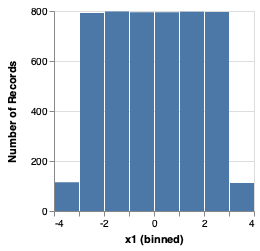

In [18]:
DataFrame(param_values) |>
@vlplot(
    :bar, 
    x={:x1, bin=true}, 
    y="count()"
)

### 2. Analyze

In [19]:
Y = ishigami(param_values);

In [22]:
results = analyze(data, Y)
results[:firstorder]

3-element Array{Float64,1}:
  0.3079752196157346  
  0.4477666102451368  
 -0.004253961705403433